## 图像基本操作

### 环境配置地址：

- Anaconda:https://www.anaconda.com/download/

- Python_whl:https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv

- eclipse:按照自己的喜好，选择一个能debug就好

![title](lena_img.png)

### 数据读取-图像

- cv2.IMREAD_COLOR：彩色图像
- cv2.IMREAD_GRAYSCALE：灰度图像

In [9]:
import cv2 #opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

img=cv2.imread('cat.jpg')

In [10]:
img

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

In [11]:
#图像的显示,也可以创建多个窗口
cv2.imshow('image',img) 
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [26]:
def cv_show(name,img):
    cv2.imshow(name,img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

In [13]:
# 图像维度
img.shape

(414, 500, 3)

In [14]:
img=cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[153, 157, 162, ..., 174, 173, 172],
       [119, 124, 129, ..., 173, 172, 171],
       [120, 124, 130, ..., 172, 171, 170],
       ...,
       [187, 182, 167, ..., 202, 191, 170],
       [165, 172, 164, ..., 185, 141, 122],
       [179, 179, 146, ..., 197, 142, 141]], dtype=uint8)

In [15]:
img.shape

(414, 500)

In [16]:
#图像的显示,也可以创建多个窗口
cv2.imshow('image',img) 
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(10000) 
cv2.destroyAllWindows()

In [17]:
#保存
cv2.imwrite('mycat.png',img)

True

In [18]:
# 图片类型
type(img)

numpy.ndarray

In [20]:
# 图像大小
img.size

207000

In [41]:
# 图像数据类型
img.dtype

dtype('uint8')

### 数据读取-视频

- cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0,1。
- 如果是视频文件，直接指定好路径即可。

In [21]:
# 获取视频流
vc = cv2.VideoCapture('test.mp4')

In [22]:
# 检查是否打开正确
if vc.isOpened(): 
    oepn, frame = vc.read()
else:
    open = False

In [23]:
while open:
    # 读取视频的第一帧，ret是表示是否读到的返回值，frame是读到的内容
    ret, frame = vc.read()
    # 读完所有帧，退出
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        # 
        if cv2.waitKey(100) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

### 截取部分图像数据

In [31]:
img=cv2.imread('cat.jpg')
cat=img[0:50,0:200] 
cv_show('cat',cat)

### 颜色通道提取

In [96]:
b,g,r=cv2.split(img)

In [101]:
r

array([[160, 164, 169, ..., 185, 184, 183],
       [126, 131, 136, ..., 184, 183, 182],
       [127, 131, 137, ..., 183, 182, 181],
       ...,
       [198, 193, 178, ..., 206, 195, 174],
       [176, 183, 175, ..., 188, 144, 125],
       [190, 190, 157, ..., 200, 145, 144]], dtype=uint8)

In [102]:
r.shape

(414, 500)

In [103]:
img=cv2.merge((b,g,r))
img.shape

(414, 500, 3)

In [32]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)



In [105]:
# 只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [106]:
# 只保留B
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

### 边界填充

In [57]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)

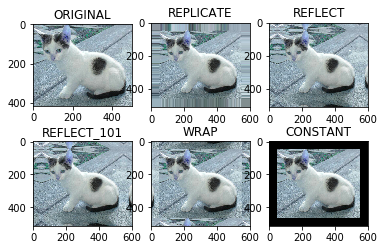

In [58]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

- BORDER_REPLICATE：复制法，也就是复制最边缘像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

### 数值计算

In [107]:
img_cat=cv2.imread('cat.jpg')
img_dog=cv2.imread('dog.jpg')

In [108]:
# np.array加常量相当于每一个像素都加这个常量
img_cat2= img_cat +10
# 只打印0通道的前5行
img_cat[:5,:,0]

array([[142, 146, 151, ..., 156, 155, 154],
       [107, 112, 117, ..., 155, 154, 153],
       [108, 112, 118, ..., 154, 153, 152],
       [139, 143, 148, ..., 156, 155, 154],
       [153, 158, 163, ..., 160, 159, 158]], dtype=uint8)

In [109]:
img_cat2[:5,:,0]

array([[152, 156, 161, ..., 166, 165, 164],
       [117, 122, 127, ..., 165, 164, 163],
       [118, 122, 128, ..., 164, 163, 162],
       [149, 153, 158, ..., 166, 165, 164],
       [163, 168, 173, ..., 170, 169, 168]], dtype=uint8)

In [110]:
#使用numpy加法对两幅图像相加，152+142=294，超过了256，自动进行取余操作，
#因为uint8类型表示数的个数最大是256
#相当于294 % 256 = 38
(img_cat + img_cat2)[:5,:,0] 

array([[ 38,  46,  56, ...,  66,  64,  62],
       [224, 234, 244, ...,  64,  62,  60],
       [226, 234, 246, ...,  62,  60,  58],
       [ 32,  40,  50, ...,  66,  64,  62],
       [ 60,  70,  80, ...,  74,  72,  70]], dtype=uint8)

In [63]:
# cv.add()函数的加法是默认超过像素最大值255，就默认保留为255，与前面numpy不同
cv2.add(img_cat,img_cat2)[:5,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [224, 234, 244, ..., 255, 255, 255],
       [226, 234, 246, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### 图像融合

In [111]:
img_cat + img_dog

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [112]:
img_cat.shape

(414, 500, 3)

In [113]:
# resize操作
img_dog = cv2.resize(img_dog, (500, 414))
img_dog.shape

(414, 500, 3)

In [117]:
# 按照权重相加，图像融合 R=alpha*x1+beta*x2+bias 
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)

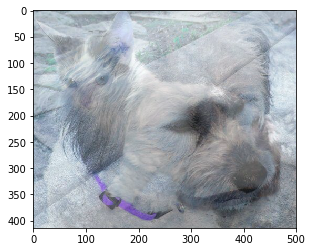

In [118]:
plt.imshow(res)

(<matplotlib.axes._subplots.AxesSubplot at 0x1ba757a48d0>,
 <matplotlib.image.AxesImage at 0x1ba757cdef0>)

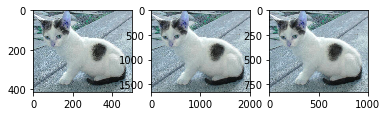

In [36]:
# resize不指定具体的数值，指定x,y轴的比例,可以放大，可以缩小
plt.subplot(1,3,1), plt.imshow(img)
res1 = cv2.resize(img, (0, 0), fx=4, fy=4)
plt.subplot(1,3,2), plt.imshow(res1)
res2 = cv2.resize(img, (0, 0), fx=2, fy=2)
plt.subplot(1,3,3),plt.imshow(res2)

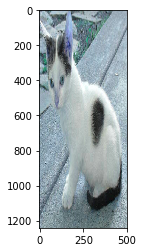

In [74]:
res = cv2.resize(img, (0, 0), fx=1, fy=3)
plt.imshow(res)